---

# Atenção!

Lembre-se de clonar este notebook antes de tentar editar as células de código.

Para isso, basta seguir os passos:

File -> Save a copy in Drive



---

# Introdução ao Google Colab

O Google Colab é um ambiente de desenvolvimento em nuvem fornecido pelo Google. Ele fornece um ambiente de programação na Linguagem Python baseado no editor [Jupyter](https://jupyter.org/). Ele combina código e documentação de texto, e é muito útil para prototipagem e ensino de computação.

O ambiente de computação do Colab usa máquinas vírtuais voláteis, mas os resultados da computação são salvos em um documento do Google Drive. Então os resultados de execução ficarão salvos, mas tudo que não estiver impresso no notebook (memória, variáveis, arquivos) será perdido no fim da sessão. Lembre de salvar tudo que irá precisar ao longo da execução. Todos os usuários têm 12h de execução por dia, podendo ter a sessão interrompida por inatividade.


### Conceitos básicos

Um documento do Colab é chamado Notebook (ou caderno), e notebooks são compostos por células. Células podem conter texto ou código e são executadas individualmente. Este é um exemplo de célula de texto, e abaixo temos um exemplo de célula de código. Para executar uma célula você pode clicar no campo e apertar o símbolo "Play", ou usar o atalho Ctrl + Enter.

In [ ]:
1 + 1

Toda a célula de código executada tem abaixo a saída da última linha executada. No exemplo anterior podemos ver o resultado na computação desta linha. Impressões feitas por meio da função `print()` ou usando logs também  aparecem na saída do notebook.

In [ ]:
print("Linha 1")
print("Linha 2")

"Resultado final"

Um último conceito importante é que a mémoria das células é compartilhada, mas a execução de células é sequencial, então uma célula pode depender de símbolos (variáveis, funções ou classes) definidos em células anteriores, contanto que sejam executadas na ordem correta.

Um erro comum no Jupyter é definir algum símbolo, escrever código que depende daquele símbolo e depois apagar o código. Isso faz com que seu código execute durante o desenvolvimento, mas quando você tentar reproduzir o notebook, o seu código não vai mais funcionar.

O Colab permite executar um notebook todo de maneira sequencial usando o comando `Runtime -> Run All`. Para limpar todos os símbolos e executar o notebook de maneira sequencial, use o comando `Runtime -> Restart and Run All`.

In [ ]:
a = 1

In [ ]:
a + 1

In [ ]:
# Assumindo que essa linha foi removida.
# b = 2

In [ ]:
# Deve levantar um erro.
# b

## Executando comandos Linux

O interpretador do Jupyter também permite a execução de comandos do terminal do Linux nas células de código. Você pode usar estes comandos para instalar pacotes no sistema, fazer Downloads, mover arquivos, etc.

Para executar um comando no Terminal, basta começar a linha da célula com uma exclamação (!). Veja um exemplo para o comando pwd abaixo, que mostra o diretório corrente.

In [ ]:
!pwd

Para instalar um pacote Python, você pode usar o comando `pip`. No entanto você deve perceber que o ambiente do Colab já vem com vários pacotes instalados, como é o caso do numpy.

In [ ]:
!pip install numpy

## Conectando o Google Drive

Se ao longo do desenvolvimento você precisar salvar arquivos de entrada ou resultados da execução do seu código, uma boa maneira de fazê-lo no Colab é usar o Google Drive. Abaixo apresentamos um exemplo de como se conectar ao Google Drive. Você pode futuramente acessar estes arquivos em um novo notebook, ou vê-los e baixá-los em [drive.google.com](drive.google.com).


Ao executar o código abaixo, a saída do notebook terá um link e um campo de entrada. Você precisa acessar o link fornecido, fazer login no Google, e copiar a chave fornecida no campo de entrada.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Após montar o diretório, tudo que for salvo em `/content/drive/MyDrive` estará disponível no seu Google Drive, e ficará salvo mesmo que a sessão seja destruida.

# Primeiros passos com o LoggiBUD

### Download do código e dados

In [ ]:
# Clone o repositório
!git clone https://github.com/loggi/loggibud

In [ ]:
# Acesse a pasta com o código
%cd /content/loggibud/
!ls  # verifique os arquivos do projeto

In [ ]:
# Instale as dependências do projeto
!pip install poetry
!poetry install
# Se você estiver executando esse script localmente, não precisa dos dois comandos abaixo
!poetry export -f requirements.txt --without-hashes --output requirements.txt
!pip install -r requirements.txt

In [ ]:
# Verifique que o código pode ser devidamente utilizado executando os testes
# automatizados e assegurando que nenhum falha
!poetry run pytest -s -v tests/

Com o repositório devidamente baixado e em funcionamento, precisamos dos dados com as entregas em cada região:

In [ ]:
# Baixe os dados compilados
!wget -nc https://loggibud.s3.amazonaws.com/dataset.zip
!unzip -n dataset.zip

--2021-10-26 00:17:08--  https://loggibud.s3.amazonaws.com/dataset.zip
Resolving loggibud.s3.amazonaws.com (loggibud.s3.amazonaws.com)... 52.217.109.188
Connecting to loggibud.s3.amazonaws.com (loggibud.s3.amazonaws.com)|52.217.109.188|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 414350105 (395M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>] 395.15M  63.8MB/s    in 6.1s    

2021-10-26 00:17:14 (65.2 MB/s) - ‘dataset.zip’ saved [414350105/414350105]

Archive:  dataset.zip
   creating: data/
   creating: data/delivery-instances-1.0/
   creating: data/delivery-instances-1.0/train/
   creating: data/delivery-instances-1.0/train/rj/
  inflating: data/delivery-instances-1.0/train/rj/rj-0.json  
  inflating: data/delivery-instances-1.0/train/rj/rj-89.json  
  inflating: data/delivery-instances-1.0/train/rj/rj-11.json  
  inflating: data/delivery-instances-1.0/train/rj/rj-86.json  
  inflating: data/delivery-instances-1

In [ ]:
# Verifique que a pasta `data/` agora não está mais vazia
!ls data/

A pasta `data/` contém diversos arquivos no formato `.json` com uma estrutura específica. Familiarize-se com ela (Exercício 2) antes de prosseguir.

### Carregando uma instância

No repositório, nós usamos estruturas de dados bem definidas para representar cada tipo de informação, e nós encorajamos que vocês leiam o código no arquivo `loggibud/loggibud/v1/types.py`.

Para exemplificar, vamos carregar uma instância de teste que está no caminho `"./data/cvrp-instances-1.0/dev/pa-0/cvrp-0-pa-90.json"`:



In [ ]:
# Comece carregando a instância
from loggibud.v1.types import CVRPInstance


file_path = "./data/cvrp-instances-1.0/dev/pa-0/cvrp-0-pa-90.json"
problem = CVRPInstance.from_file(file_path)
problem

A variável `problem` contém todas as informações necessárias sobre as entregas realizadas na região PA com índice 0, no nonagésimo primeiro dia (começamos a contagem de dias no 0, o que explica 90 ser o 91º).

Esta variável é do tipo `CVRPInstance`, que contém as seguintes propriedades:

```python
class CVRPInstance:
    name: str   
    region: str   
    origin: Point   
    vehicle_capacity: int   
    deliveries: List[Delivery]
```

Aqui está o uso de algumas delas:

In [ ]:
print(f"A capacidade de cada veículo é: {problem.vehicle_capacity}")
print(f"A localização do ponto de partida é: {problem.origin}")
print(f"Esta instância possui um total de {len(problem.deliveries)} entregas")

In [ ]:
# Use este espaço para familiarizar-se com as outras propriedades desta variável

A origem do problema, que é o ponto de partida de onde saem os veículos para realizar as entregas, é outra variável do tipo `Point`, com a seguinte estrutura:

```python
class Point:
    lng: float
    lat: float
```

Logo, ela contém suas coordenadas (latitude e longitude).

Neste problema há 297 entregas. Vamos analisar como elas são estruturadas:

In [ ]:
# Vamos analisar a primeira delas. O restante segue o mesmo formato
delivery = problem.deliveries[0]
delivery

Assim, cada entrega é do tipo `Delivery`, e elas possuem além das coordenadas como no caso da origem, um identificador e uma demanda representada por `size`:

```python
class Delivery:
    id: str
    point: Point
    size: int
```

In [ ]:
# Use este espaço para analisar outras propriedades ou outras entregas deste problema

Finalmente, podemos visualizar todas as entregas em um mapa para termos uma melhor visão do tipo de problema que estamos lidando:

In [ ]:
from loggibud.v1.plotting.plot_instance import plot_cvrp_instance


plot_cvrp_instance(problem)
# Experimente mover e dar zoom no mapa
# Se estiver executando este código localmente num shell, substitua o comando acima pelo seguinte:
# plot_cvrp_instance(problem).save_to("map.html")
# Abra o arquivo `map.html` num navegador para ter a mesma experiência daqui

## Resolvendo uma instância de um Problema Estático

O problema que pretendemos resolver pode ser estabelecido de diversas formas. Uma maneira compreensível de entendê-lo é que cada um dos pontos `problem.deliveries` do mapa acima é um pedido com um determinado "tamanho", e todas as rotas partem do nosso ponto de partida `problem.origin`. Para entregá-las, nós possuímos diversos veículos, cada um com uma capacidade para suportar um número de entregas.

Nosso objetivo é organizar cada pedido em um veículo e construir rotas para entregá-los da forma mais eficiente possível.

Este problema, apesar de simples de compreender, exige um certo aprofundamento para que seja bem resolvido para os requisitos de uma grande empresa. Nós faremos isso gradativamente ao longo deste curso. Nesta aula inicial, vamos nos limitar à familiarização com o repositório.

O nosso repositório já possui alguns algoritmos prontos para resolver nosso problema (chamados comumente de "solvers"), então vamos fazer uso deles para entender que tipo de solução esperamos.

Vamos utilizar um solver chamado [LKH-3](http://webhotel4.ruc.dk/~keld/research/LKH-3/) (não se preocupe em conhecer todas as siglas de uma vez. Para todos os propósitos, considere isto como uma função que cria rotas para os pedidos desenhados acima)

In [ ]:
from loggibud.v1.baselines.task1 import lkh_3
from loggibud.v1.distances import OSRMConfig

# Usamos o OSRM para calcular as distâncias entre um pedido e outro
osrm_config = OSRMConfig(host="http://ec2-34-222-175-250.us-west-2.compute.amazonaws.com")
lkh_params = lkh_3.LKHParams(osrm_config=osrm_config)

solution = lkh_3.solve(problem, params=lkh_params)
solution

Várias coisas aconteceram nesta célula.

Para organizar os pedidos em rotas eficientes, precisamos saber as distâncias entre um e o outro. Você deve estar familiarizado com a distância Euclidiana, que basicamente dá a distância em linha reta entre dois pontos. Porém, ela não basta para nossos propósitos já que estamos em uma cidade, e precisamos nos movimentar por ruas, e não atravessando lares das pessoas.

Sendo assim, nós usamos um serviço chamado [Open Source Routing Machine](http://project-osrm.org/) (OSRM), que retorna a distância de rua em vez da Euclidiana. Existe um servidor preparado para os alunos do curso, e a variável `osrm_config` armazena seu endereço.

Fora esta configuração, a função `solve` do módulo `lkh_3` resolve o problema `problem`.

Assim como existe o tipo `CVRPInstance` para descrever uma instância, existe o `CVRPSolution` para descrever uma possível solução. Ela possui o formato:

```python
class CVRPSolution(JSONDataclassMixin):
    name: str
    vehicles: List[CVRPSolutionVehicle]
```

A propriedade `vehicles` contém uma lista, em que cada elemento é uma variável com a rota seguida pelo veículo.

Cada veículo, por sua vez, é um `CVRPSolutionVehicle` da forma:

```python
class CVRPSolutionVehicle:
    origin: Point
    deliveries: List[Delivery]
```

Logo, cada um contém o ponto de partida (que neste caso é sempre o mesmo e é igual a `problem.origin`), e um conjunto de entregas. Este conjunto é um subconjunto de todas as entregas em `problem.deliveries`, com a diferença de que a ordem em que as entregas aparecem na lista é a mesma ordem com que elas são entregues na realidade.

In [ ]:
print(f"Nossa solução precisou de {len(solution.vehicles)} veículos/rotas")

In [ ]:
# Use este espaço para analisar novamente os parâmetros de sua `solution`

Caso estas listas de listas soem um tanto abstratas, podemos visualizar as rotas retornadas:

In [ ]:
from loggibud.v1.plotting.plot_solution import plot_cvrp_solution


plot_cvrp_solution(solution)

Esta visualização ilustra as entregas em linha reta de uma para outra. Existe no mesmo módulo uma função para traçá-las nas ruas, que pode ser mais intuitiva neste caso:

In [ ]:
# Aqui estão as rotas visualizadas em rua
from loggibud.v1.plotting.plot_solution import plot_cvrp_solution_routes


plot_cvrp_solution_routes(solution, config=osrm_config)

Volte algumas células para rever as posições dos pedidos, e compare novamente com as rotas.

Além de visualizá-las, podemos também querer determinar qual a distância total em km que deve ser percorrida por todos os nossos veículos.

In [ ]:
from loggibud.v1.eval.task1 import evaluate_solution


evaluate_solution(problem, solution, config=osrm_config)

## Resolvendo uma instância de um Problema Dinâmico

O problema anterior assume que todas as entregas já estão disponíveis no nosso ponto de partida. Porém, na realidade de empresas grandes como a Loggi, nós normalmente não temos espaço suficiente para comportar todas as entregas de um dia; e mesmo que dispuséssemos de galpões gigantescos, os pedidos podem chegar em momentos imprevisíveis, e não faria sentido deixar entregas que já chegaram esperando para então executar o algoritmo de antes. Como se não bastasse, podem existir outras restrições operacionais, como alguns pedidos possuírem prazos distintos de entregas.

Sendo assim, é interessante que nosso solver seja capaz de atribuir uma entrega a um veículo à medida em que ela torna-se disponível para nós. Este é o caso de interesse neste curso.

O problema de antes costuma ser conhecido como "Estático" já que toda informação necessária está disponível desde o início e mantém-se fixa. Em contraste, este problema em que a informação mostra-se disponível com o tempo é denominado "Dinâmico".

### Resolvendo o problema usando uma solução ingênua

### Visão geral

Teremos todo o curso para nos familiarizar e aprofundar neste problema e nas razões pelas quais ele é tão complexo. Nesta aula introdutória, entretanto, faz sentido tentar resolvê-lo com um algoritmo "ingênuo".

O nosso algoritmo funciona da seguinte forma:

- Comece com um veículo vazio;
- Ao chegar um novo pedido, coloque-o neste veículo se houver espaço. Caso contrário, finalize esta rota e parta para o próximo veículo;
- Repita o processo até que todos os pacotes sejam processados.

Bem simples, certo? Para exemplificar, considere o seguinte problema com 8 entregas. Elas chegam na ordem 1, 2, 3, ..., 8, mas, claro, isto não é conhecido _a priori_ por nós. Imagine que temos 3 veículos disponíveis, cada um com capacidade para 3 pacotes.

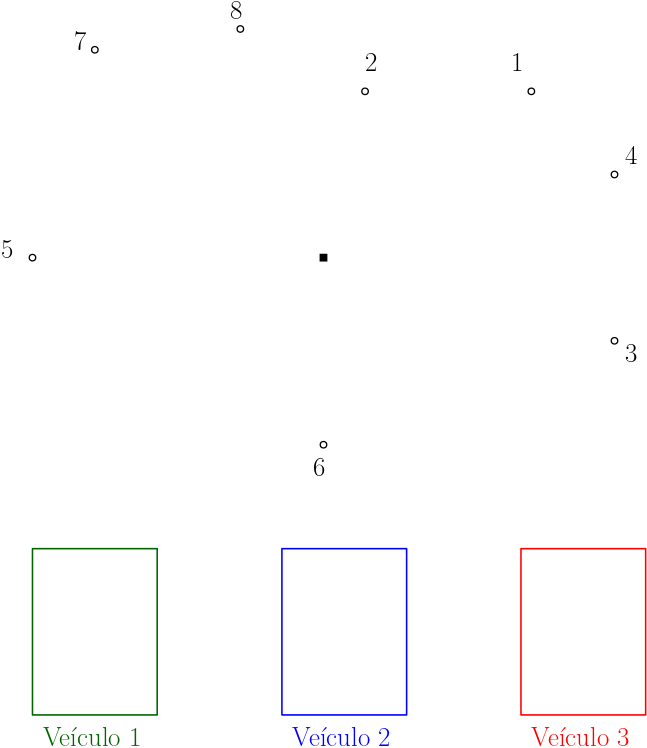

O que nosso algoritmo faria é:

1. Coloque o pacote 1 no veículo 1;
2. Coloque o próximo pacote 2 no veículo 1;
3. Coloque o pacote 3 no veículo 1;

A partir daí, o veículo 1 estaria cheio, e partiríamos para o próximo. No final das contas, nossas rotas seriam as seguintes:

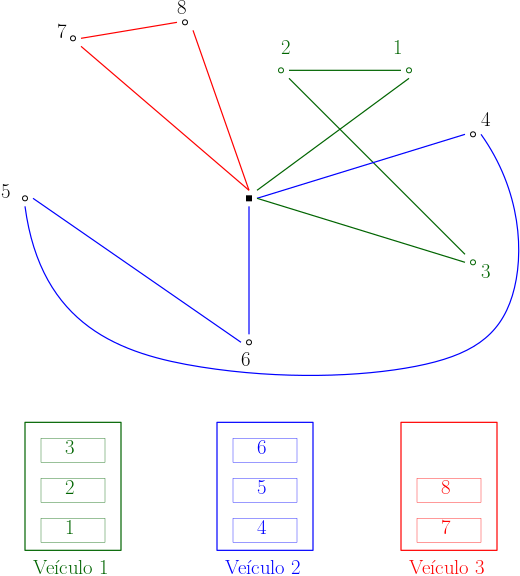

Esta proposta é bastante simples. Você consegue já prever alguns dos seus contratempos (Exercício 4)?

### Implementação

Com o algoritmo entendido, basta implementá-lo. Analise com bastante atenção o código a seguir:

In [ ]:
from loggibud.v1.types import CVRPSolution, CVRPSolutionVehicle


def solve_vrp_naive_algorithm(problem):
    vehicles = []  # lista com todos os veículos
    vehicle_deliveries = []  # inicializa o primeiro veículo vazio
    for delivery in problem.deliveries:
        if (
            _compute_vehicle_volume(vehicle_deliveries) + delivery.size
            <= problem.vehicle_capacity
        ):
            vehicle_deliveries.append(delivery)
        else:
            vehicle_solution = _construct_vehicle(problem, vehicle_deliveries)
            vehicles.append(vehicle_solution)
            # Inicializa novo veículo com o pacote atual
            vehicle_deliveries = [delivery]

    # Complete a rota do veículo final que sobrou
    if vehicle_deliveries:
        vehicle_solution = _construct_vehicle(problem, vehicle_deliveries)
        vehicles.append(vehicle_solution)

    # Ao final, retorne uma variável do tipo `CVRPSolution`
    return CVRPSolution(name=problem.name, vehicles=vehicles)


def _compute_vehicle_volume(deliveries):
    volume = 0
    for delivery in deliveries:
        volume += delivery.size
    return volume


def _construct_vehicle(problem, vehicle_deliveries):
    return CVRPSolutionVehicle(
        origin=problem.origin, deliveries=vehicle_deliveries
    )

In [ ]:
# Vamos experimentá-lo com o mesmo problema analisado antes
solution = solve_vrp_naive_algorithm(problem)
solution

In [ ]:
# Aqui estão as rotas visualizadas em rua
from loggibud.v1.plotting.plot_solution import plot_cvrp_solution_routes
from loggibud.v1.distances import OSRMConfig


osrm_config = OSRMConfig(host="http://ec2-34-222-175-250.us-west-2.compute.amazonaws.com")
plot_cvrp_solution_routes(solution, config=osrm_config)

Aparentemente tudo parece o.k., certo? Um pouco bagunçado, mas sob controle.

Bem, nesta visualização não é muito claro quando precisamos ir e voltar na mesma via diversas vezes. Neste caso, podemos melhor visualizar estes problemas com o seguinte mapa:

In [ ]:
# Aqui estão as rotas visualizadas em linha reta
from loggibud.v1.plotting.plot_solution import plot_cvrp_solution


plot_cvrp_solution(solution)

Veja a quantidade de zigue-zagues que geramos em diversas das rotas. Este problema é o mesmo de antes, então vale a pena comparar estas rotas com a do nosso solver anterior.

Aqui está a distância total percorrida. Compare com o outro algoritmo, quando temos toda a informação disponível desde o início:

In [ ]:
from loggibud.v1.eval.task1 import evaluate_solution


evaluate_solution(problem, solution, config=osrm_config)

# Resumo

Nesta primeira aula nós tivemos nosso primeiro contato com o Colab e com o repositório do LoggiBUD. Bastante informação foi oferecida, mas não se preocupe em digerir tudo de uma vez. A proposta aqui foi oferecer uma visão superficial do problema que pretendemos resolver e das ferramentas disponíveis.

Nas próximas aulas vamos nos aprofundar aos poucos em problemas importantes da literatura de Otimização Combinatória para que o nosso desafio seja bem compreendido.

# Exercícios

Para um melhor aprendizado, experimente elaborar uma solução por conta própria para cada exercício para só então comparar com as soluções sugeridas.

## Exercício 1

**Familiarize-se com as células de código do Collab**

Construa uma calculadora com as funções de somar, subtrair, multiplicar e dividir. Crie uma função específica em cada célula, e em uma quinta experimente com as funções criadas.

Sugestão: crie cada função com o formato

```python
def add(x, y):
    return x + y
```

In [ ]:
# Programe aqui sua solução

## Exercício 2

**Familiarize-se com a estrutura dos arquivos de dados.**

Navegue na pasta `data/` e verifique como as informações usadas neste curso estão disponíveis.

Dica: pode ser tedioso usar uma combinação de `%cd` e `!ls` em cada pasta. Sendo assim, experimente pesquisar sobre o comando `tree`. Ele provavelmente não virá instalado, mas isso pode ser resolvido simplesmente com

```bash
!apt-get install tree
```

In [ ]:
# Programe aqui sua solução

## Exercício 3

**Repita o processo de resolver um problema do zero com o solver `lkh_3` para as seguintes instâncias:**

- `dev/df-0/cvrp-0-df-90.json`
- `dev/rj-0/cvrp-0-rj-90.json`

Para cada uma,
- visualize os pontos de entrega;
- acompanhe o tempo gasto para resolvê-las;
- verifique a distância total das rotas com `evaluate_solution`;
- visualize as rotas geradas.
- determine o tempo gasto pelo algoritmo.

Dica: Para o tempo, uma abordagem simples é usar a função "mágica" `%timeit`. Basta colocá-la antes da linha de código que queremos testar, por exemplo:

```python
from loggibud.v1.baselines.task1 import lkh_3
from loggibud.v1.distances import OSRMConfig

# Usamos o OSRM para calcular as distâncias entre um pedido e outro
osrm_config = OSRMConfig(host="http://ec2-34-222-175-250.us-west-2.compute.amazonaws.com")
lkh_params = lkh_3.LKHParams(osrm_config=osrm_config)

%timeit solution = lkh_3.solve(problem, params=lkh_params)
solution
```

Ao final, a célula retorna o tempo gasto para executar a linha `solution = lkh_3.solve(problem, params=lkh_params)`.

In [ ]:
# Programe aqui sua solução

## Exercício 4

**Experimente enumerar alguns problemas do nosso algoritmo ingênuo.**

In [ ]:
# Programe aqui sua solução

## Exercício 5

**Repita o exercício 3 com o nosso solver ingênuo. Compare a distância total das rotas em cada caso.**

In [ ]:
# Programe aqui sua solução

## Exercício Suplementar

Pesquise por ou imagine possibilidades melhores de solução do problema na versão dinâmica.

Dica: Experimente procurar por palavras-chave como "Problema de Roteamento de Veículos Dinâmico" ou "Dynamic Vehicle Routing Problem".

## Tarefa de casa

**Manipulando planilhas do Drive usando Python**

Em uma empresa com funcionários de diversas formações, poder manipular arquivos usando Python é uma ferramenta muito poderosa. Neste exercício vamos aprender a fazer isso usando o Colab.

Desenvolva um código que resolve a instância `dev/df-0/cvrp-0-df-100.json` com o algoritmo ingênuo, retorna uma variável `solution` do tipo `CVRPSolution` e salva seu conteúdo em arquivo `solution_loggibud.json` em seu drive. Ao final, suba o arquivo gerado no formulário desta tarefa.

Algumas dicas:

1. Pesquise sobre o módulo `json` para aprender a como salvar arquivos neste formato. A função `asdict` do módulo `itertools` pode ser útil para converter a solução no formato esperado.

2. Use o esquema abaixo como ponto de partida.

Lembre-se de estar devidamente conectado ao seu drive como descrito na primeira seção desta aula.

In [ ]:
# Inclua aqui todo o código para resolver a instância dada com o solver ingênuo
# Ao final você deve ter uma variável `solution` do tipo `CVRPSolution`.

In [ ]:
import json

file_path = "/content/drive/MyDrive/solution_loggibud.json"

with open(file_path, "w") as file:
    # Salve aqui seu arquivo